# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$


Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
where $W(t)\sim\mathcal{N}(0,t)$.
Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
with $Z_i \sim \mathcal{N}(0,1)$


<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

Con questo esercizio vogliamo simulare un processo markoviano, ovvero un processo in cui la probabilità di transizione tra stati dipende solo dallo stato corrente e non da come è stato raggiunto. Un esempio è l'andamento del prezzo di una put e una call option alla europea sotto le assunzioni di Black e Scholes.

L'assunzione di Black e Scholes consiste nell'affermare che il prezzo di un asset $S(t)$ segue un moto Browniano Geometrico con drift e volatibilità costanti. In questo modo il processo è effettivamente un processo di Markov. In questo esercizio dunque calcoliamo il prezzo di una call-option $C[S(t),t]$ e di una put-option $P[S(t),t]$ a $t = 0$.

Fissando:
- il prezzo iniziale dell'asset $S(0) = 100$,
- il prezzo di esercizio dell'opzione $K = 100$,
- il tempo di scadenza dell'opzione $T = 1$,
- il tasso di interesse $r = 0.1$ e
- la volatilità $\sigma = 0.25$,

la soluzione analitica di Black-Scholes ci dice che i prezzi della call-option $C[S(0),0]$ e della put-option $P[S(0),0]$ sono:

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erf
from numpy import exp, log, sqrt

######################################################################################################
# Soluzione analitica (Black-Scholes)
######################################################################################################

# Definizione della funzione N(x) utilizzata per calcolare la funzione di distribuzione cumulativa
def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

# Definizione della funzione Black-Scholes per calcolare il prezzo delle opzioni
def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)  # Prezzo di una call option
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2) - 1.)  # Prezzo di una put option
    return C, P

if __name__ == "__main__":
    # Parametri per il calcolo dei prezzi delle opzioni
    S0 = 100.  # Prezzo iniziale dell'asset
    K = 100.   # Prezzo di esercizio dell'opzione
    T = 1.     # Tempo di scadenza dell'opzione
    r = 0.1    # Tasso di interesse
    sigma = 0.25  # Volatilità dell'asset

    # Calcolo dei prezzi delle opzioni con il modello Black-Scholes
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ANALITIC SOLUTION==")
    print("call: ", call)
    print("put: ", put)

#####################################################################################################

 == BLACK-SCHOLES ANALITIC SOLUTION==
call:  14.975790778311286
put:  5.4595325819072364


Un modo per calcolare quanto detto, senza usare la soluzione analitica, è quello di campionare il prezzo finale $S(T)$ tramite un moto Browniano Geometrico. Questo si può fare in due diversi modi:
- campionando direttamente $S(T)$,
- dividendo l'intervallo $[0,T]$ in sottointervalli e campionando $S(0),\ S(t_1),\ ...$

L'equivalenza dei due metodi è garantita dalle proprietà del moto Browniano Geometrico.

Ho dunque calcolato in tutti e due i modi $S(T)$ e quindi $C[S(0),0]$ e $P[S(0),0]$ per $10^6$ volte; ho diviso queste misure in 500 blocchi da cui ho estratto la media. Nei grafici riportati si può osservare il valore medio di questi ultimi con l'incertezza statistica a loro associata all'aumentare del numero di blocchi.

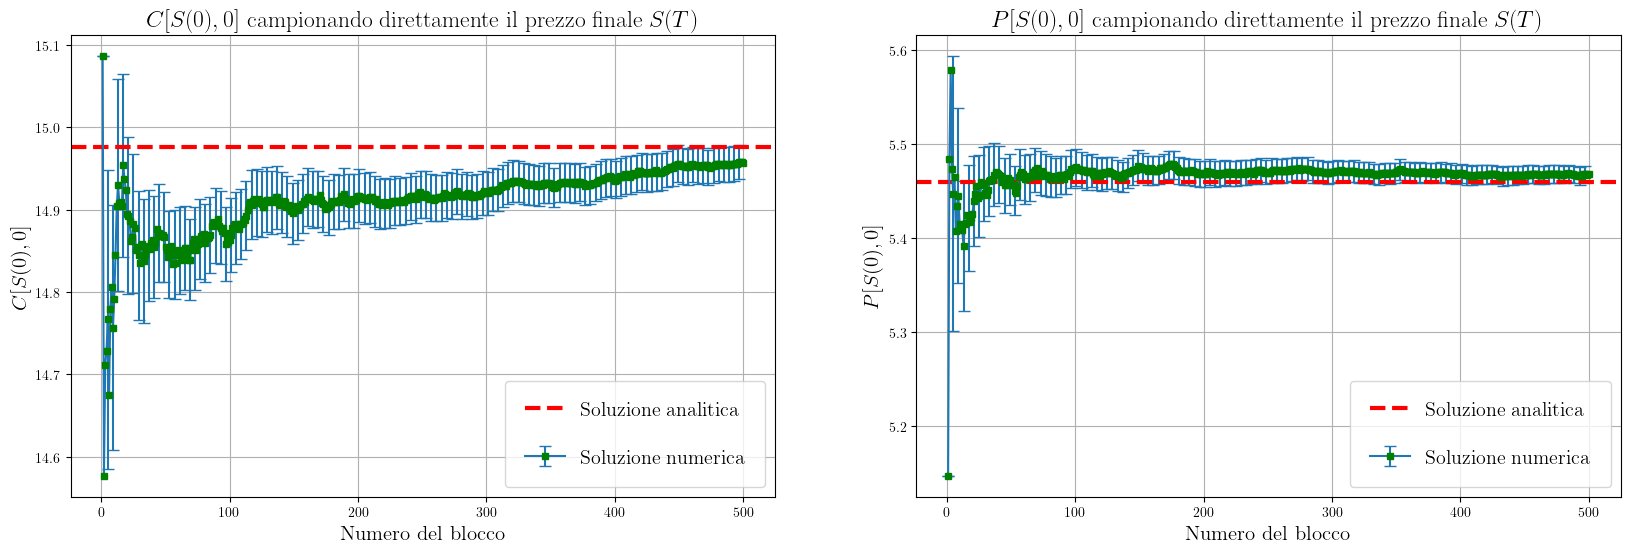

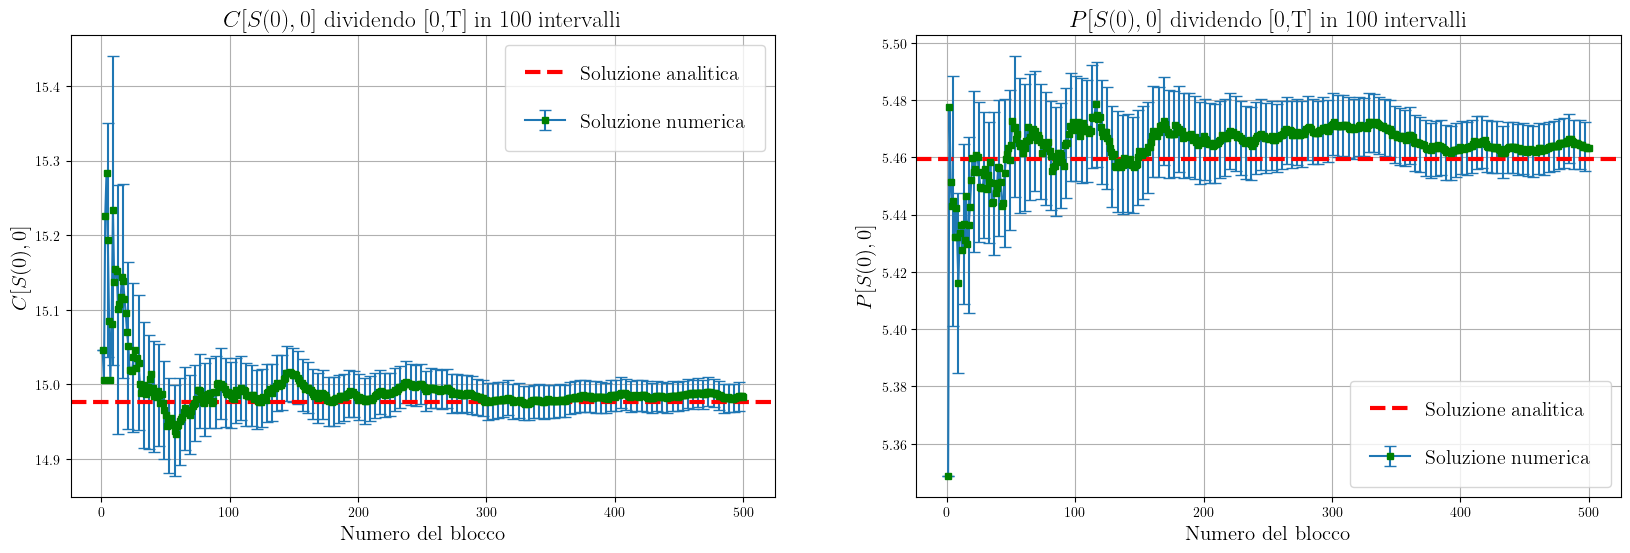

In [34]:
# Configurazione di Matplotlib per utilizzare LaTeX per la formattazione del testo
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Caricamento dei dati per tutti e quattro i grafici dai file "risultati.dat"
x, y1, error1, y2, error2, y3, error3, y4, error4 = np.loadtxt("esercizio_3.1/risultati.dat", usecols=(0,1,2,3,4,5,6,7,8), delimiter=' ', unpack=True)

# Creazione delle figure con due subplot ciascuna
fig1, axs1 = plt.subplots(1, 2, figsize=(20, 6))  # Modifica della larghezza a 14 pollici per entrambe le figure

# Grafico 1: Call option campionata direttamente usando il prezzo finale dell'asset S(T)
axs1[0].errorbar(x, y1, yerr=error1, errorevery=4, capsize=4, marker='s', mfc='green', mec='green', ms=5, mew=1, label = 'Soluzione numerica')
axs1[0].set_xlabel('Numero del blocco', fontsize=15)
axs1[0].set_ylabel(r'$C[S(0),0]$', fontsize=15)
axs1[0].set_title(r'$C[S(0),0]$ campionando direttamente il prezzo finale $S(T)$', fontsize=17)
axs1[0].grid()
axs1[0].axhline(y=call, color='red', linestyle='--', linewidth=3, label = 'Soluzione analitica')
axs1[0].legend(loc='lower right', fontsize='x-large', markerscale=1, borderpad=1, labelspacing=1.5, handlelength=2)

# Grafico 2: Put option campionata direttamente usando il prezzo finale dell'asset S(T)
axs1[1].errorbar(x, y2, yerr=error2, errorevery=4, capsize=4, marker='s', mfc='green', mec='green', ms=5, mew=1, label = 'Soluzione numerica')
axs1[1].set_xlabel('Numero del blocco', fontsize=15)
axs1[1].set_ylabel(r'$P[S(0),0]$', fontsize=15)
axs1[1].set_title(r'$P[S(0),0]$ campionando direttamente il prezzo finale $S(T)$', fontsize=17)
axs1[1].grid()
axs1[1].axhline(y=put, color='red', linestyle='--', linewidth=3, label = 'Soluzione analitica')
axs1[1].legend(loc='lower right', fontsize='x-large', markerscale=1, borderpad=1, labelspacing=1.5, handlelength=2)
#plt.tight_layout()

# Creazione delle figure con due subplot ciascuna
fig2, axs2 = plt.subplots(1, 2, figsize=(20, 6))  # Modifica della larghezza a 14 pollici per entrambe le figure

# Grafico 3: Call option campionata usando il percorso discretizzato del prezzo dell'asset S(T)
axs2[0].errorbar(x, y3, yerr=error3, errorevery=4, capsize=4, marker='s', mfc='green', mec='green', ms=5, mew=1, label = 'Soluzione numerica')
axs2[0].set_xlabel('Numero del blocco', fontsize=15)
axs2[0].set_ylabel(r'$C[S(0),0]$', fontsize=15)
axs2[0].set_title(r'$C[S(0),0]$ dividendo [0,T] in 100 intervalli', fontsize=17)
axs2[0].grid()
axs2[0].axhline(y=call, color='red', linestyle='--', linewidth=3, label = 'Soluzione analitica')
axs2[0].legend(loc='upper right', fontsize='x-large', markerscale=1, borderpad=1, labelspacing=1.5, handlelength=2)

# Grafico 4: Put option campionata usando il percorso discretizzato del prezzo dell'asset S(T)
axs2[1].errorbar(x, y4, yerr=error4, errorevery=4, capsize=4, marker='s', mfc='green', mec='green', ms=5, mew=1, label = 'Soluzione numerica')
axs2[1].set_xlabel('Numero del blocco', fontsize=15)
axs2[1].set_ylabel(r'$P[S(0),0]$', fontsize=15)
axs2[1].set_title(r'$P[S(0),0]$ dividendo [0,T] in 100 intervalli', fontsize=17)
axs2[1].grid()
axs2[1].axhline(y=put, color='red', linestyle='--', linewidth=3, label = 'Soluzione analitica')
axs2[1].legend(loc='lower right', fontsize='x-large', markerscale=1, borderpad=1, labelspacing=1.5, handlelength=2)

# Regolazione della disposizione dei subplot e visualizzazione delle figure
#plt.tight_layout()
plt.show()

Come si vede, in tutti i casi il risultato finale risulta essere entro un sigma dal risultato analitico.